# shape morphing dataset

---

## 概要
正方形，円，三角形の三つの図形を用いて，モーフィングデータセットを作成する．


## 手順

- [x] 正方形，円，三角形を描画

- []  morphingアルゴリズムの実装

    - [x] 100点で三つの図形を描画

    - [x] 最近傍点の検索
    
    - [x] 線形補完点の作成

- [x] pngで保存

- [] ndarrayに変換


## 保存形式
バイナリファイル（npy）に圧縮

(m, H, W)

m: morphing parameter range(0, 1, 0.1)

H: Height

W: Width

## Directory

data/

    processed/

        morphing_circlue_square/

            000.npy
            ...
            999.npy

        morphing_circle_triangle/

        morphing_square_triangle/

---

# src

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import math
import os

In [38]:
os.makedirs("./img", exist_ok=True)

---

## shape_100

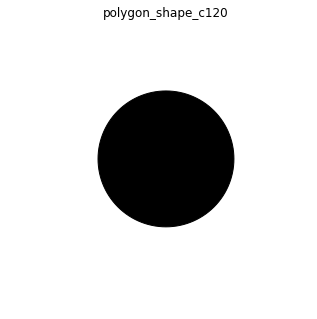

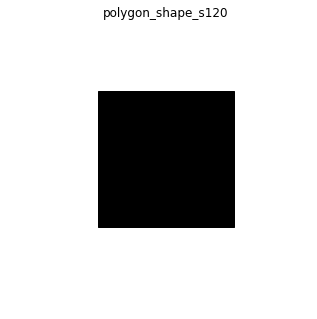

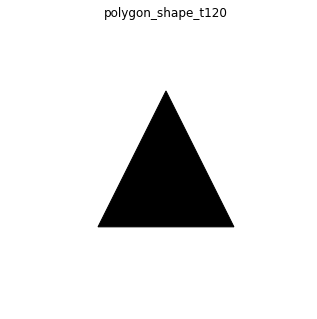

In [239]:
def circle(N):
    xy = []
    radius = 0.25
    c = 0.5
    for theta in np.arange(0, 360, 360//N):
        x = c + radius * math.cos(2*math.pi*theta/360)
        y = c + radius * math.sin(2*math.pi*theta/360)
        xy.append([x, y])
    return np.array(xy)

def square(N):
    line_N = N // 4
    xy = []

    start, end = 0.25, 0.75
    step = abs(end - start) /line_N
    # under
    for dot in np.arange(start, end, step):
        x = dot
        y = start
        xy.append([x, y])
    # right
    for dot in np.arange(start, end, step):
        y = dot
        x = end
        xy.append([x, y])

    start, end = 0.75, 0.25
    step = - abs(end - start) /line_N
    # top
    for dot in np.arange(start, end, step):
        x = dot
        y = start
        xy.append([x, y])
    # left
    for dot in np.arange(start, end, step):
        y = dot
        x = end
        xy.append([x, y])

    return np.array(xy)

def triangle(N):
    line_N = N // 3
    xy = []
    # under
    start, end = 0.25, 0.75
    step = abs(end - start) /line_N
    for dot in np.arange(start, end, step):
        x = dot
        y = start
        xy.append([x, y])
    # right
    start, end = 0.75, 0.5
    step = - abs(end - start) /line_N
    for dot in np.arange(start, end, step):
        x = dot
        y = 1.75 - 2 * dot
        xy.append([x, y])
    # left
    start, end = 0.5, 0.25
    step = -abs(end - start) /line_N
    for dot in np.arange(start, end, step):
        x = dot
        y = - 0.25 + 2 * dot
        xy.append([x, y])

    return np.array(xy)

arr = []
N = 120
xy_circle = circle(N)
xy_square = square(N)
xy_triangle = triangle(N)

circle_patch = patches.Polygon(xy=xy_circle, closed=True, fc="black", ec="black")
square_patch = patches.Polygon(xy=xy_square, closed=True, fc="black", ec="black")
triangle_patch = patches.Polygon(xy=xy_triangle, closed=True, fc="black", ec="black")

shapes = {
    "polygon_shape_c"+ str(N): circle_patch,
    "polygon_shape_s"+ str(N): square_patch,
    "polygon_shape_t"+ str(N): triangle_patch,
}

for shape_name, patch in shapes.items():

    plt.figure(figsize=(5, 5))
    ax = plt.axes()

    ax.add_patch(patch)

    plt.axis("off")
    ax.set_aspect("equal")
    plt.title(shape_name)

    plt.savefig("./img/{}.png".format(shape_name))

In [240]:
xy_triangle.shape, xy_circle.shape, xy_square.shape

((120, 2), (120, 2), (120, 2))

# npyの確認

In [8]:
import glob
from PIL import Image

In [29]:
files = glob.glob("../data/tmp/np/*.npy")
files

['../data/tmp/np/circle_triangle.npy',
 '../data/tmp/np/square_triangle.npy',
 '../data/tmp/np/circle_square.npy',
 '../data/tmp/np/triangle_square.npy',
 '../data/tmp/np/triangle_circle.npy',
 '../data/tmp/np/square_circle.npy']

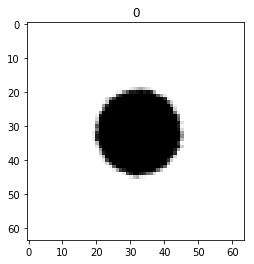

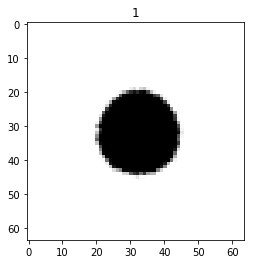

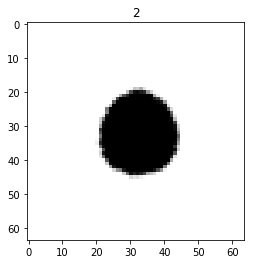

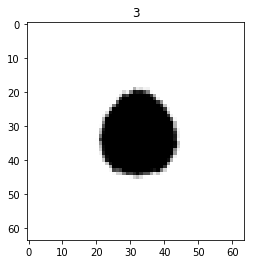

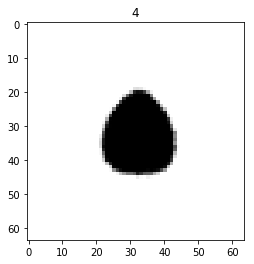

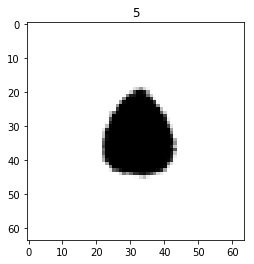

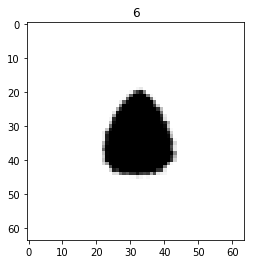

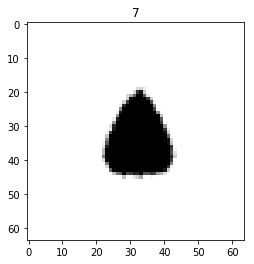

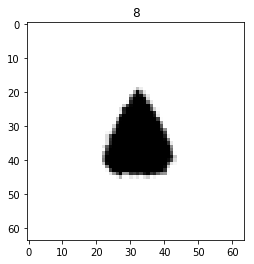

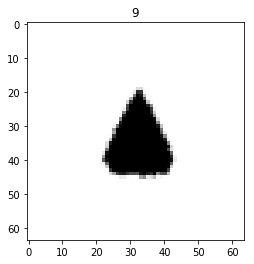

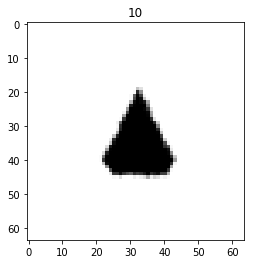

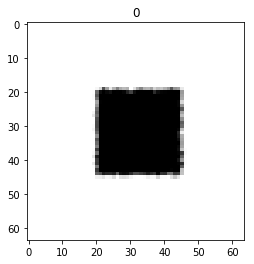

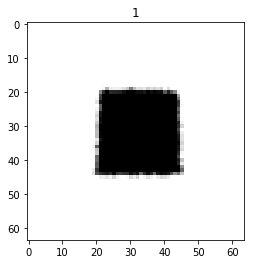

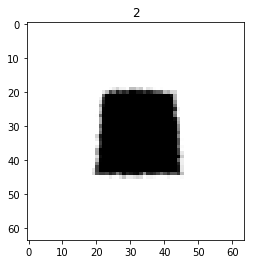

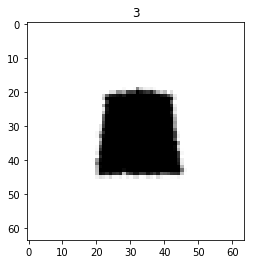

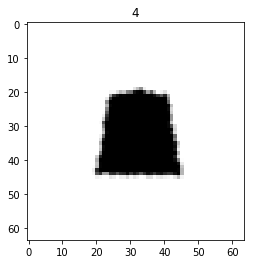

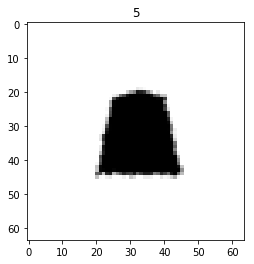

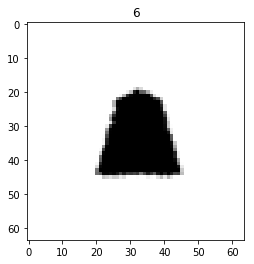

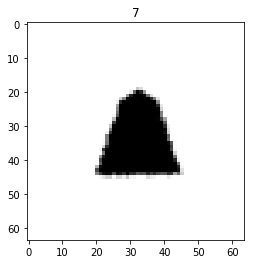

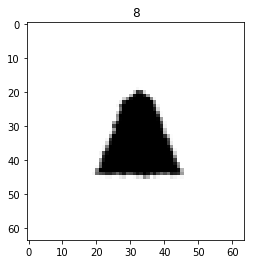

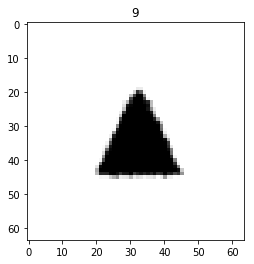

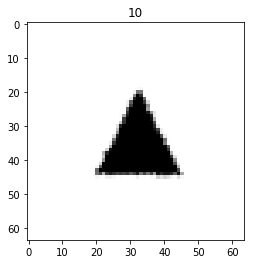

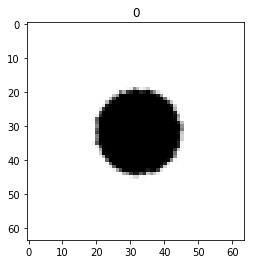

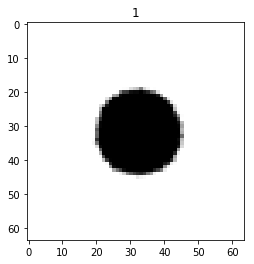

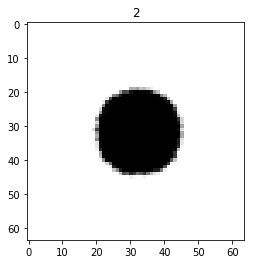

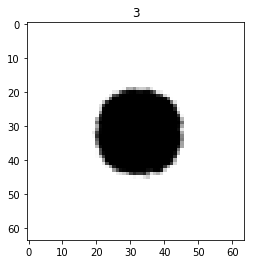

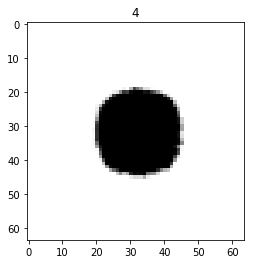

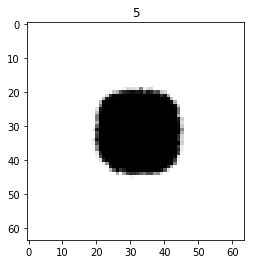

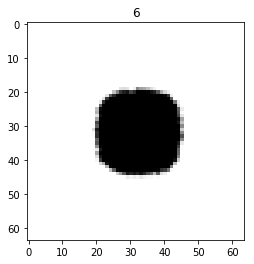

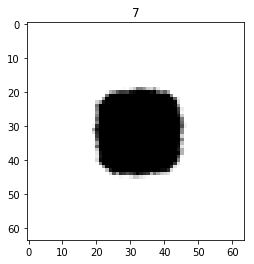

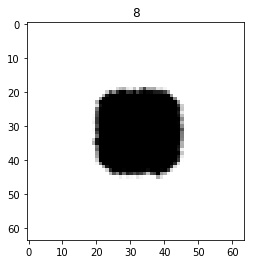

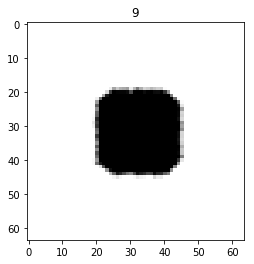

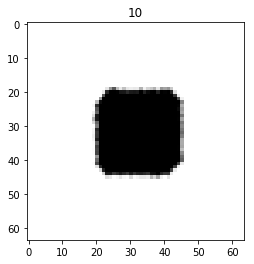

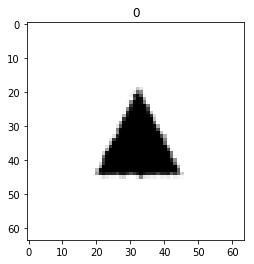

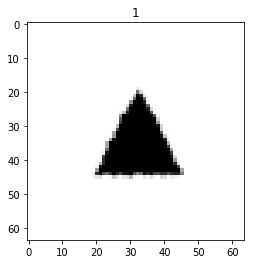

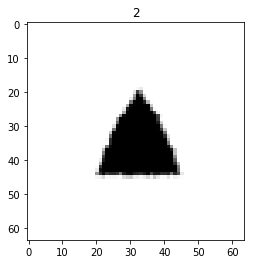

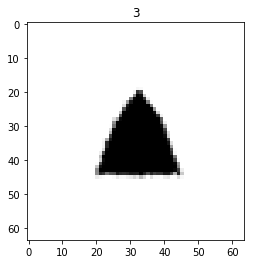

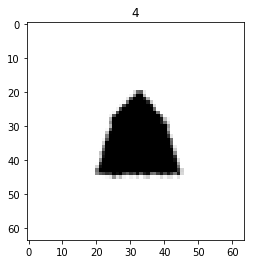

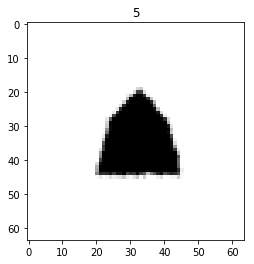

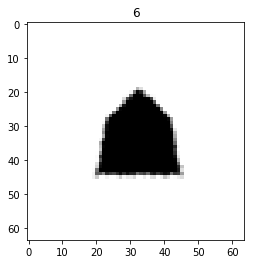

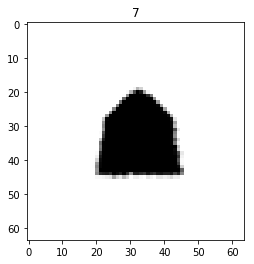

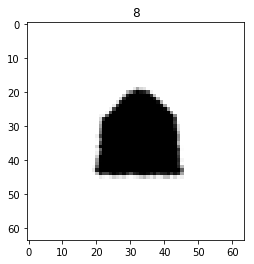

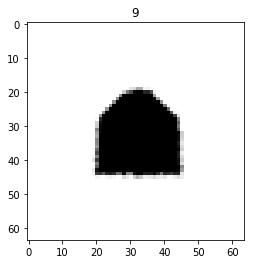

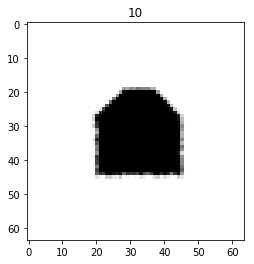

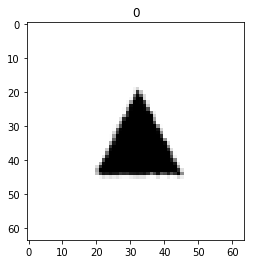

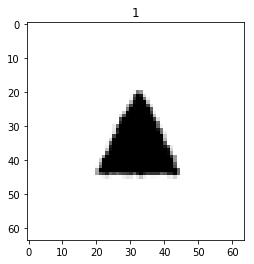

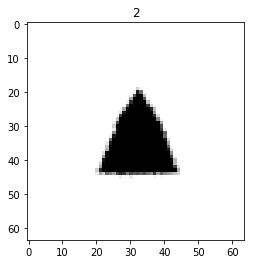

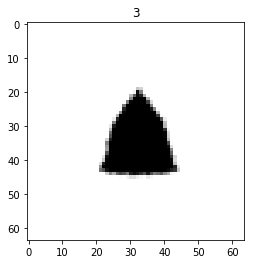

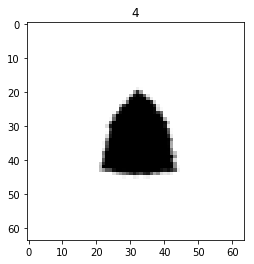

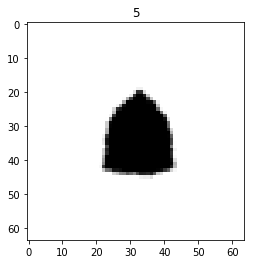

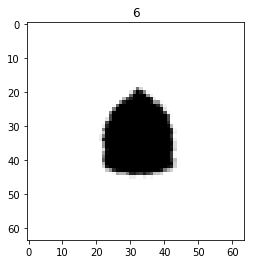

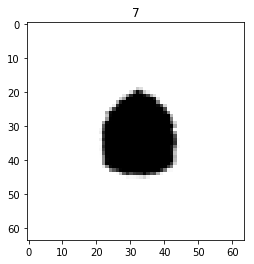

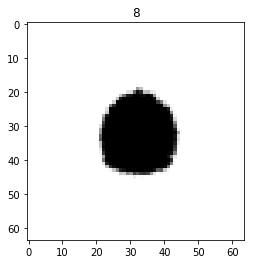

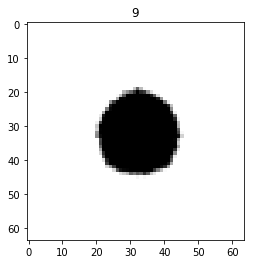

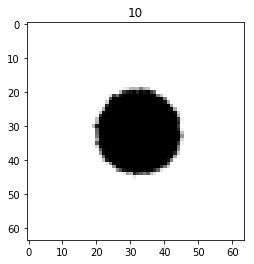

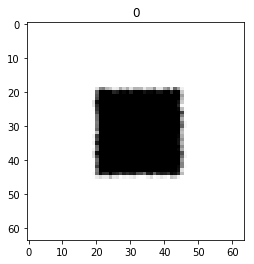

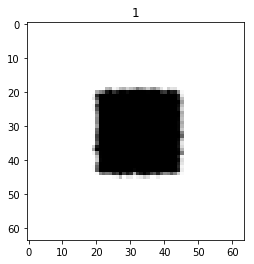

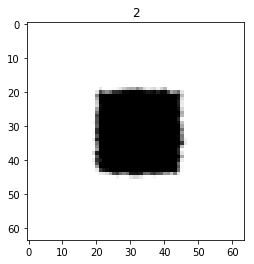

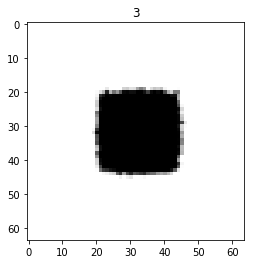

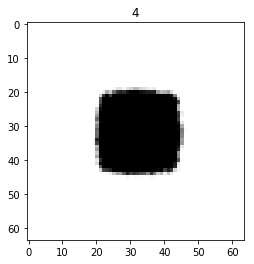

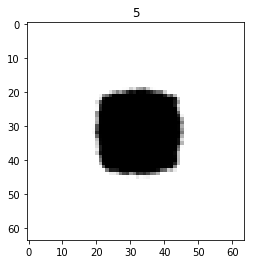

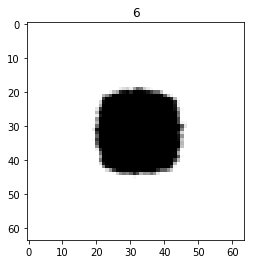

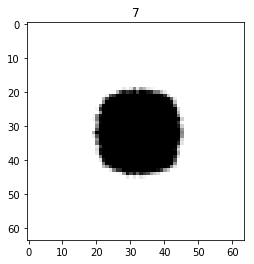

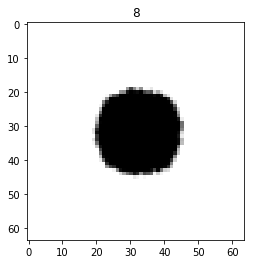

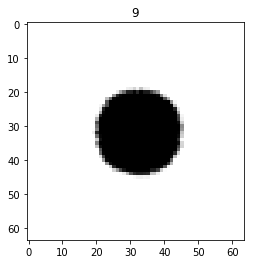

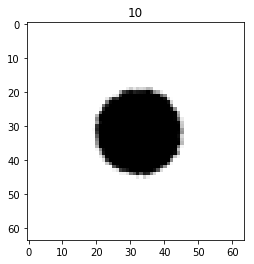

In [32]:
for f in files:
    arr = np.load(f)
    for step in range(arr.shape[0]):
        img = Image.fromarray(arr[step])
        plt.imshow(img)
        plt.title(str(step))
        plt.show()